<a href="https://www.kaggle.com/code/aniketdvd/quora-duplicate-ques-ver1?scriptVersionId=162709661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings     #to ignore warnings as we already aware of that
warnings.filterwarnings('ignore') 

In [3]:
old_df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')

In [4]:
old_df.shape

(404290, 6)

In [5]:
old_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# **Basic EDA**

In [6]:
df =old_df.sample(200000,random_state=2) 

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
df.shape

(199999, 6)

is_duplicate
0    126369
1     73630
Name: count, dtype: int64
is_duplicate
0    63.184816
1    36.815184
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

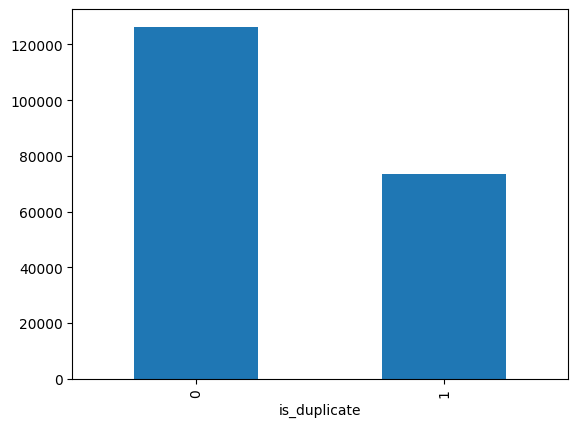

In [11]:
#Distribution of duplicate and non-duplicate questions 
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
#Repeated questions
Qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions',np.unique(Qid).shape[0])

x=Qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 302289
Number of questions getting repeated 47663


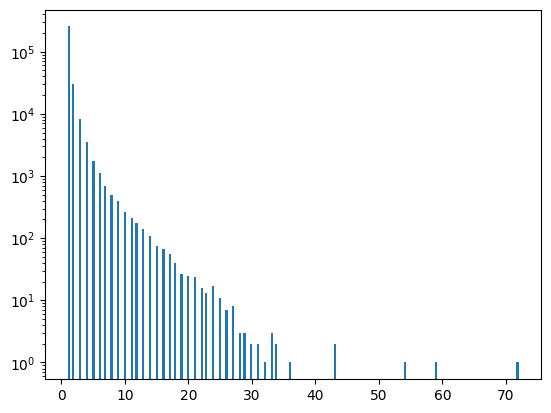

In [13]:
#Repeated question histogram

plt.hist(Qid.value_counts().values,bins=200)
plt.yscale('log')
plt.show()

# **Feature Engineering**

In [14]:
#creating 2 new features to contain the length of ques1 and ques2
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [15]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [16]:
#creating 2 new features to get the number of words in each ques1 and ques2 respectively
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" "))if pd.notna(row) else 0)
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" "))if pd.notna(row) else 0)
df.head()

#there are some flotting and NAN values in the dataset to avoid them use this-> (if pd.notna(row) else 0) ; here we have already droped those rows 

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [17]:
#function to return the common words in both ques ->adding new feature as word_common
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1&w2)

In [18]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [19]:
#function to return the total words in both ques ->adding new feature as total_words
def total_words(row):
    w1= set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+ len(w2))

In [20]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [21]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


# **Analysis of features**

min character 1
max character 430
avg num of char 59


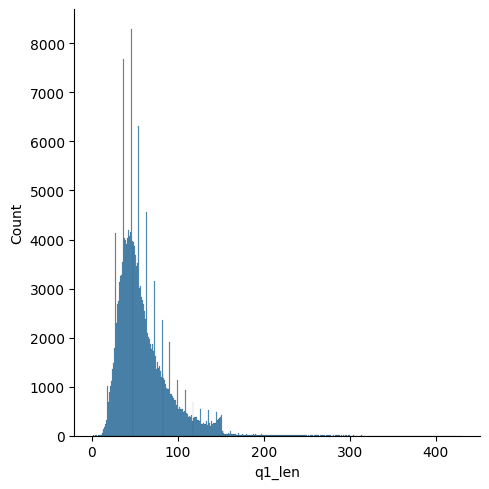

In [22]:
sns.displot(df['q1_len'])
print('min character', df['q1_len'].min())
print('max character',df['q1_len'].max())
print('avg num of char', int(df['q1_len'].mean()))

min character 4
max character 1169
avg num of char 60


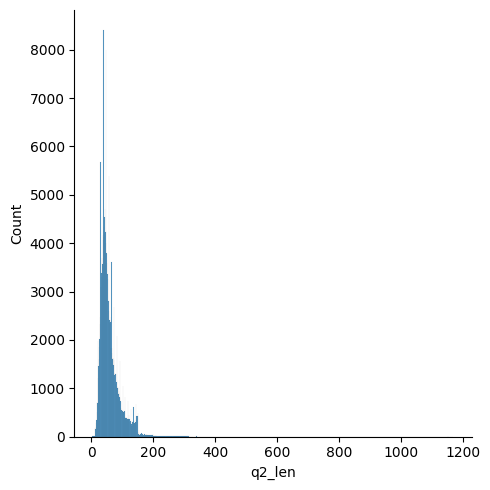

In [23]:
sns.displot(df['q2_len'])
print('min character', df['q2_len'].min())
print('max character',df['q2_len'].max())
print('avg num of char', int(df['q2_len'].mean()))

min character 1
max character 81
avg num of char 10


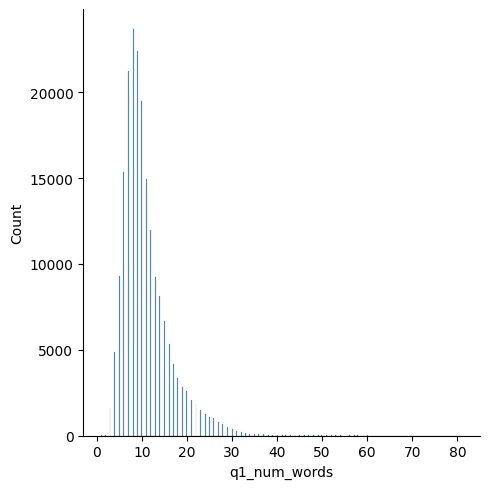

In [24]:
sns.displot(df['q1_num_words'])
print('min character', df['q1_num_words'].min())
print('max character',df['q1_num_words'].max())
print('avg num of char', int(df['q1_num_words'].mean()))

min character 1
max character 237
avg num of char 11


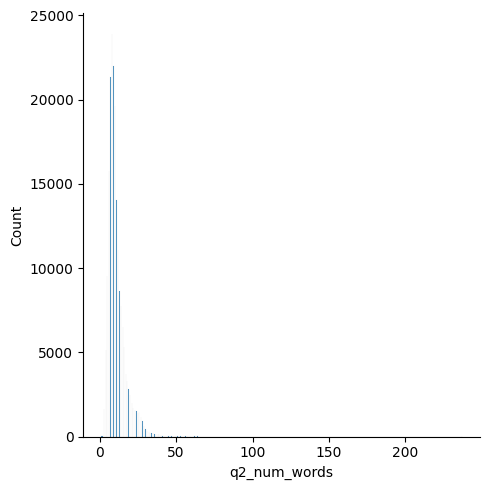

In [25]:
sns.displot(df['q2_num_words'])
print('min character', df['q2_num_words'].min())
print('max character',df['q2_num_words'].max())
print('avg num of char', int(df['q2_num_words'].mean()))

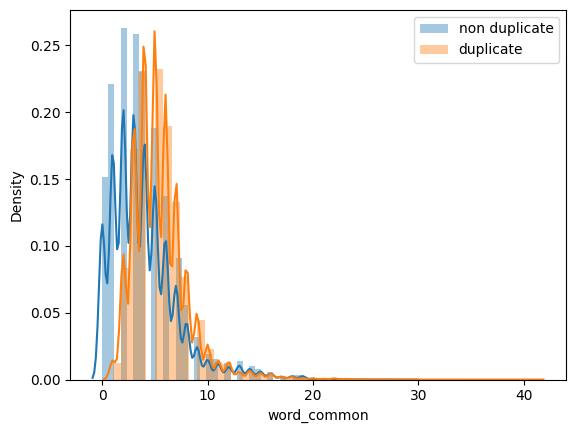

In [26]:
#common words
sns.distplot(df[df['is_duplicate']==0]['word_common'],label ='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_common'], label='duplicate')
plt.legend()
plt.show()

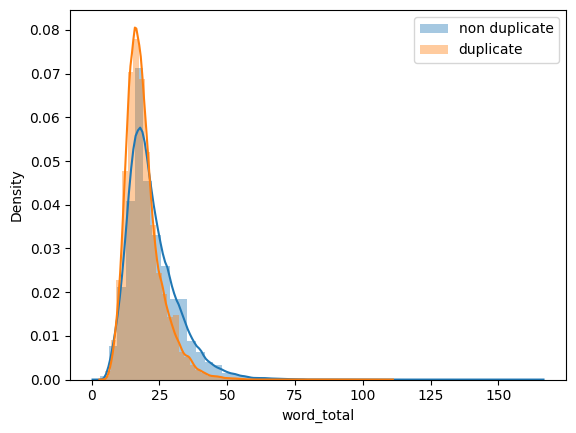

In [27]:
#total words
sns.distplot(df[df['is_duplicate']==0]['word_total'],label ='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_total'], label='duplicate')
plt.legend()
plt.show()

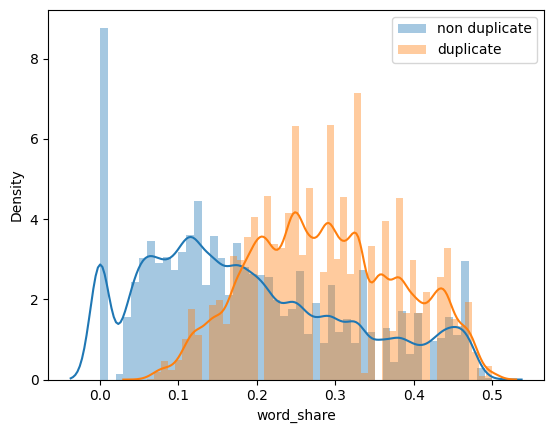

In [28]:
sns.distplot(df[df['is_duplicate']==0]['word_share'],label ='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'], label='duplicate')
plt.legend()
plt.show()

In [29]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [30]:
final_df = df.drop(columns=(['id','qid1','qid2','question1','question2']))
print(final_df.shape)
final_df.head()

(199999, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
 # merging text
ques= list(ques_df['question1'])+list(ques_df['question2'])

cv =CountVectorizer(max_features=1500)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(ques).toarray(),2)


In [32]:
df1 = pd.DataFrame(q1_arr, index= ques_df.index)
df2 = pd.DataFrame(q2_arr, index= ques_df.index)
df3 = pd.concat([df1,df2],axis=1)
df3.shape

(199999, 3000)

In [33]:
final_df = pd.concat([final_df,df3],axis=1)
print(final_df.shape)
final_df.head()

(199999, 3008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Models**

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [35]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8096

In [36]:
#XG Boost
from xgboost import XGBClassifier
xgb =XGBClassifier()
xgb.fit(X_train,y_train)
y_pred2 =xgb.predict(X_test)
accuracy_score(y_test,y_pred2)

0.783775

In [37]:
#Softmax Regression
from sklearn.linear_model import LogisticRegression
sm = LogisticRegression(multi_class='multinomial')
sm.fit(X_train,y_train)
y_pred3= sm.predict(X_test)
accuracy_score(y_test,y_pred3)

0.738475

In [38]:
# In this problem confusion metics also be a better metrics as me want to know how much not duplicated ques get predicted as non duplicate and non duplicate predicted as duplicate
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred1))

,0,1
0,22350,2953
1,4663,10034


In [39]:
pd.DataFrame(confusion_matrix(y_test,y_pred2))

,0,1
0,20949,4354
1,4295,10402


In [40]:
pd.DataFrame(confusion_matrix(y_test,y_pred3))

,0,1
0,21129,4174
1,6287,8410


Out of the used model Random Forest is giving the best accuracy result and also the number of False Negative outcomes is also less compared to the other algorithms. 
Here FN play crutial role as they can impact the user interation because they will get someother answer of the ques they asked because the question is assigned as duplicate so out of the 2 only 1 user will get the correct answer for those who come under FN.
so RF is the best algo here.